In [12]:
# 导包
import pandas as pd
import matplotlib.pyplot as plt

#设置中文显示和负号显示
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来显示中文
plt.rcParams["axes.unicode_minus"] = False  # 用来显示负号

In [13]:
#读取数据
data = pd.read_excel('./销售记录.xlsx')

In [14]:
data.shape

(15092, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单编号    15092 non-null  object        
 1   客户ID    15092 non-null  int64         
 2   客户名称    15092 non-null  object        
 3   客户编号    15092 non-null  object        
 4   客户省份    15092 non-null  object        
 5   销售代表ID  15092 non-null  int64         
 6   下单日期    15092 non-null  datetime64[ns]
 7   预计送货日期  15092 non-null  datetime64[ns]
 8   实际送货日期  15092 non-null  datetime64[ns]
 9   产品ID    15092 non-null  int64         
 10  产品名称    15092 non-null  object        
 11  数量      15092 non-null  int64         
 12  单价      15092 non-null  float64       
 13  金额      15092 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(4), object(5)
memory usage: 1.6+ MB


In [16]:
data.head(5)

,订单编号,客户ID,客户名称,客户编号,客户省份,销售代表ID,下单日期,预计送货日期,实际送货日期,产品ID,产品名称,数量,单价,金额
0,SO45266,29955,广东29955自行车销售有限公司,10-4020-000018,广东,212,2015-01-01,2015-01-13,2015-01-02,743,山地自行车,11,2039.9940,22439.9340
1,SO45266,29955,广东29955自行车销售有限公司,10-4020-000018,广东,212,2015-01-01,2015-01-13,2015-01-06,745,山地自行车车架,3,722.5949,2167.7847
2,SO45267,29611,福建29611自行车销售有限公司,10-4020-000271,福建,211,2015-01-01,2015-01-13,2015-01-03,709,公路自行车,5,874.7940,4373.9700
3,SO45268,29548,江苏29548自行车销售有限公司,10-4020-000318,江苏,201,2015-01-01,2015-01-13,2015-01-08,709,公路自行车,2,419.4589,838.9178
4,SO45269,29620,福建29620自行车销售有限公司,10-4020-000353,福建,211,2015-01-01,2015-01-13,2015-01-08,743,山地自行车,1,2024.9940,2024.9940


In [17]:
data.tail(5)

,订单编号,客户ID,客户名称,客户编号,客户省份,销售代表ID,下单日期,预计送货日期,实际送货日期,产品ID,产品名称,数量,单价,金额
15087,SO458161,11830,广西11830自行车销售有限公司,10-4030-011830,广西,209,2016-02-29,2016-03-12,2016-03-14,709,公路自行车,1,3578.2700,3578.2700
15088,SO458171,14801,浙江14801自行车销售有限公司,10-4030-014801,浙江,204,2016-02-29,2016-03-12,2016-03-06,709,公路自行车,1,3578.2700,3578.2700
15089,SO458181,14868,天津14868自行车销售有限公司,10-4030-014868,天津,208,2016-02-29,2016-03-12,2016-03-10,709,公路自行车,1,699.0982,699.0982
15090,SO458191,20160,浙江20160自行车销售有限公司,10-4030-020160,浙江,204,2016-02-29,2016-03-12,2016-03-06,709,公路自行车,1,3578.2700,3578.2700
15091,SO458201,25832,上海25832自行车销售有限公司,10-4030-025832,上海,202,2016-02-29,2016-03-12,2016-03-04,709,公路自行车,1,699.0982,699.0982


In [18]:
# 检查数据缺失值（或称为空值、NaN值等）
data.isnull().sum() # 注：本数据特殊 没有缺失值

订单编号      0
客户ID      0
客户名称      0
客户编号      0
客户省份      0
销售代表ID    0
下单日期      0
预计送货日期    0
实际送货日期    0
产品ID      0
产品名称      0
数量        0
单价        0
金额        0
dtype: int64

In [19]:
# 统计各省份销售额和销量
province_sales = data.groupby('客户省份').agg({'金额': 'sum', '数量': 'sum'})
province_sales = province_sales.sort_values(by='金额', ascending=False)

In [20]:
province_sales

,金额,数量
客户省份,,
广东,5.007356e+06,5465
北京,4.308690e+06,5883
上海,3.948521e+06,6269
福建,3.004622e+06,5409
江苏,2.991088e+06,4786
内蒙古,2.914304e+06,3945
浙江,2.859320e+06,4004
天津,2.697914e+06,4517
甘肃,2.549441e+06,2900


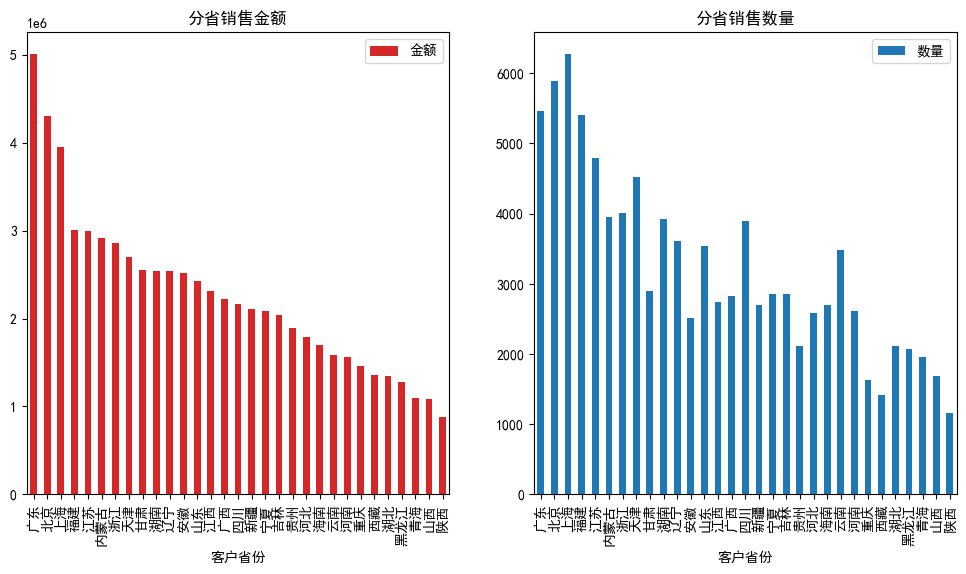

In [21]:
# 绘制折线图
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
province_sales.plot(kind='bar', y='金额', ax=ax[0], color='tab:red')
province_sales.plot(kind='bar', y='数量', ax=ax[1], color='tab:blue')
ax[0].set_title('分省销售金额')
ax[1].set_title('分省销售数量')
plt.show()

In [22]:
# 根据年份、月份和省份对销售数据进行分组和汇总
province_month_sales = data.groupby(['客户省份', pd.Grouper(key='下单日期', freq='M')]).agg({'金额': 'sum'})
province_month_sales = province_month_sales.reset_index()

In [23]:
province_month_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   客户省份    721 non-null    object        
 1   下单日期    721 non-null    datetime64[ns]
 2   金额      721 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.0+ KB


In [24]:
province_month_sales.head(5)

,客户省份,下单日期,金额
0,上海,2015-01-31,213159.5617
1,上海,2015-02-28,145602.0381
2,上海,2015-03-31,189226.7777
3,上海,2015-04-30,82812.4701
4,上海,2015-05-31,404885.7028


In [25]:
province_month_sales.tail(5)

,客户省份,下单日期,金额
716,黑龙江,2016-08-31,3996.640
717,黑龙江,2016-09-30,7159.750
718,黑龙江,2016-10-31,11326.886
719,黑龙江,2016-11-30,3307.320
720,黑龙江,2016-12-31,2827.156


In [26]:
# 对数据进行透视，将省份作为列，年份和月份作为索引，销售金额作为值
province_month_sales_pivot = province_month_sales.pivot(index='下单日期', columns='客户省份', values='金额')

In [27]:
province_month_sales_pivot.shape

(24, 31)

In [28]:
province_month_sales_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2015-01-31 to 2016-12-31
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   上海      23 non-null     float64
 1   云南      24 non-null     float64
 2   内蒙古     23 non-null     float64
 3   北京      23 non-null     float64
 4   吉林      24 non-null     float64
 5   四川      23 non-null     float64
 6   天津      24 non-null     float64
 7   宁夏      24 non-null     float64
 8   安徽      23 non-null     float64
 9   山东      24 non-null     float64
 10  山西      22 non-null     float64
 11  广东      23 non-null     float64
 12  广西      24 non-null     float64
 13  新疆      23 non-null     float64
 14  江苏      23 non-null     float64
 15  江西      24 non-null     float64
 16  河北      21 non-null     float64
 17  河南      23 non-null     float64
 18  浙江      24 non-null     float64
 19  海南      23 non-null     float64
 20  湖北      24 non-null     float64
 21  湖南      23 non-null  

In [29]:
province_month_sales_pivot.head(3)

客户省份,上海,云南,内蒙古,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
下单日期,,,,,,,,,,,,,,,,,,,,,
2015-01-31,213159.5617,77268.1754,210881.6148,405247.7710,240980.1372,341365.2094,219786.2100,191725.7643,365101.7753,179664.8434,...,422306.5650,430630.9904,176288.9965,132891.7185,152725.5227,282298.2308,53344.7768,99070.0889,184126.9884,34350.9820
2015-02-28,145602.0381,73631.0773,90293.3842,34897.7936,10378.2500,11433.9082,76507.6586,84999.7174,265615.2771,103616.9765,...,21469.6200,136775.8734,25611.4945,73485.0942,14109.8000,59157.2064,63915.1580,6460.9848,16012.4144,48902.5231
2015-03-31,189226.7777,24489.1563,7077.4460,173034.6582,264516.0755,158942.3360,130367.5551,230437.0610,300840.4488,15932.6000,...,422935.5009,167711.2046,91730.6037,125917.3766,159284.1927,300346.4478,36680.8282,125903.1544,60170.5960,37841.5342


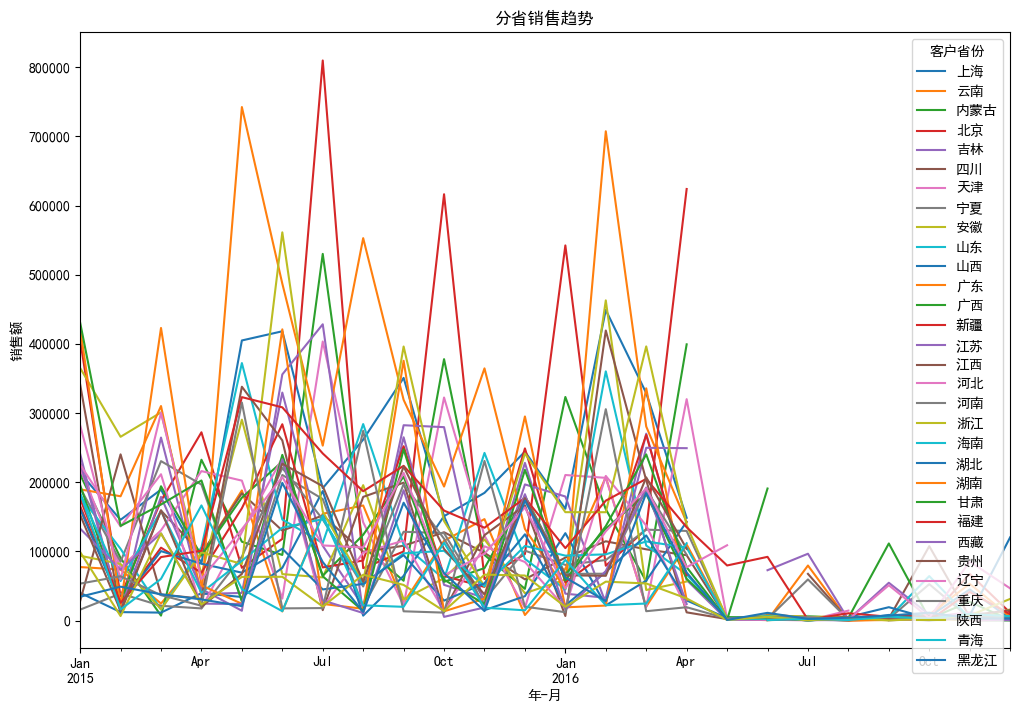

In [30]:
# 绘制不同省份销售额的折线图
province_month_sales_pivot.plot(kind='line', figsize=(12, 8))
plt.title('分省销售趋势')
plt.xlabel('年-月')
plt.ylabel('销售额')
plt.show()

In [31]:
# 统计每个产品的销售量和销售额
product_sales = data.groupby('产品名称').agg({'金额': 'sum', '数量': 'sum'})
product_sales = product_sales.sort_values(by='金额', ascending=False)

In [32]:
product_sales

,金额,数量
产品名称,,
公路自行车,4.143287e+07,27080
山地自行车,1.846224e+07,12761
公路自行车车架,4.122502e+06,7535
山地自行车车架,3.290356e+06,4563
旅游自行车,7.267101e+05,492
山地自行车后轮,3.889592e+05,2039
公路自行车前轮,2.144522e+05,1097
女士紧身衣,2.051074e+05,4562
长袖运动衫,1.701631e+05,5854


In [33]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [34]:
# 对产品销售数据进行汇总和排序
product_sales = data.groupby('产品名称').agg({'金额': 'sum', '数量': 'sum'}).sort_values('金额', ascending=False)

In [35]:
product_sales

,金额,数量
产品名称,,
公路自行车,4.143287e+07,27080
山地自行车,1.846224e+07,12761
公路自行车车架,4.122502e+06,7535
山地自行车车架,3.290356e+06,4563
旅游自行车,7.267101e+05,492
山地自行车后轮,3.889592e+05,2039
公路自行车前轮,2.144522e+05,1097
女士紧身衣,2.051074e+05,4562
长袖运动衫,1.701631e+05,5854


In [36]:
# 分析产品价格弹性和销售数量关系
product_price = data.groupby('产品名称').agg({'金额': 'mean', '数量': 'mean'})
product_price = product_price.sort_values(by='金额', ascending=False)

In [37]:
product_price

,金额,数量
产品名称,,
公路自行车,11034.053158,7.211718
山地自行车,9836.036980,6.798615
旅游自行车车架,7799.215385,13.307692
山地自行车车架,7546.688146,10.465596
公路自行车车架,7509.111215,13.724954
旅游自行车,7195.149639,4.871287
山地自行车后轮,1262.854597,6.620130
大齿盘,1233.482571,5.285714
公路自行车前轮,912.562583,4.668085


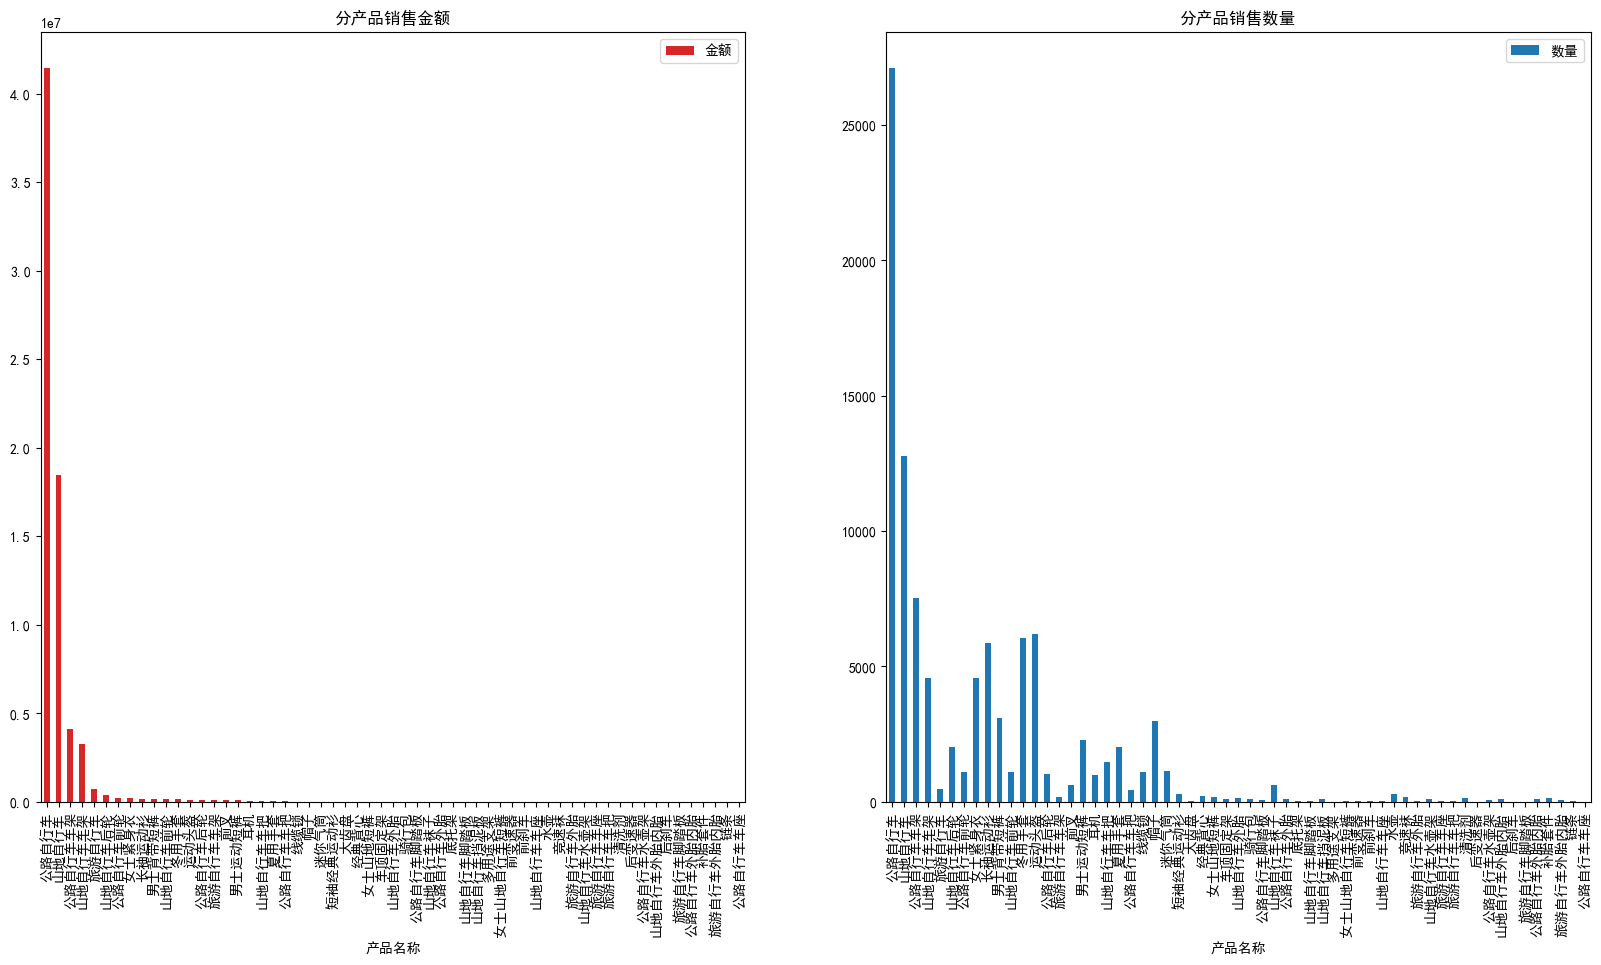

In [38]:
# 绘制柱状图
fig, ax = plt.subplots(1, 2, figsize=(20,10))
product_sales.plot(kind='bar', y='金额', ax=ax[0], color='tab:red')
product_sales.plot(kind='bar', y='数量', ax=ax[1], color='tab:blue')
ax[0].set_title('分产品销售金额')
ax[1].set_title('分产品销售数量')
plt.show()

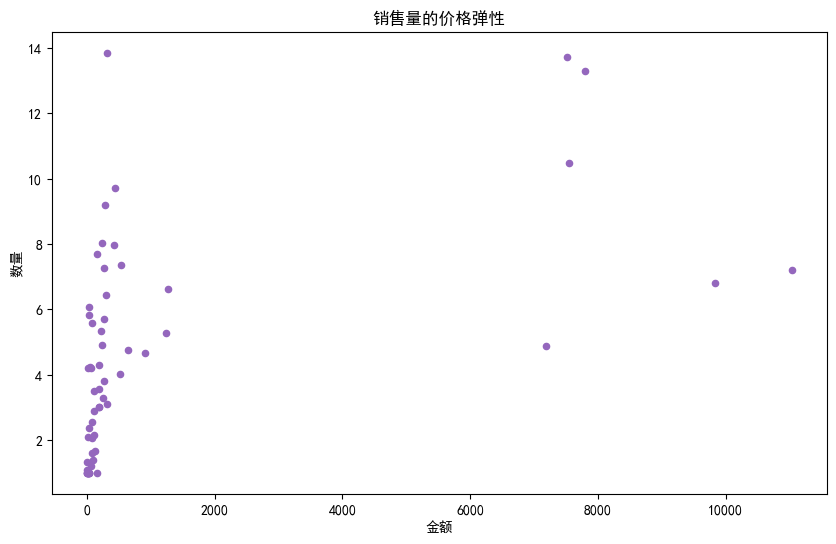

In [39]:
# 绘制价格弹性曲线
fig, ax = plt.subplots(figsize=(10, 6))
product_price.plot(kind='scatter', x='金额', y='数量', ax=ax, color='tab:purple')
ax.set_title('销售量的价格弹性')
plt.show()

In [40]:
# 比较不同销售代表的销售业绩
salesperson_sales = data.groupby('客户名称').agg({'金额': 'sum', '数量': 'sum'})
salesperson_sales = salesperson_sales.sort_values(by='金额', ascending=False)

In [41]:
salesperson_sales

,金额,数量
客户名称,,
江西29614自行车销售有限公司,1.210464e+06,1339
安徽29994自行车销售有限公司,1.042928e+06,855
广东29646自行车销售有限公司,1.013658e+06,853
吉林29716自行车销售有限公司,9.632599e+05,896
北京29715自行车销售有限公司,9.591557e+05,753
...,...,...
黑龙江20795自行车销售有限公司,3.990000e+00,1
黑龙江25477自行车销售有限公司,3.990000e+00,1
广东11322自行车销售有限公司,2.290000e+00,1


In [42]:
sales_performance = data.groupby('销售代表ID')['金额'].sum().reset_index()

In [43]:
sales_performance

,销售代表ID,金额
0,201,5.507299e+06
1,202,3.948521e+06
2,203,3.665914e+06
3,204,2.859320e+06
4,205,4.308690e+06
5,206,5.077591e+06
6,207,5.865176e+06
7,208,7.406464e+06
8,209,3.927254e+06
9,210,2.542008e+06


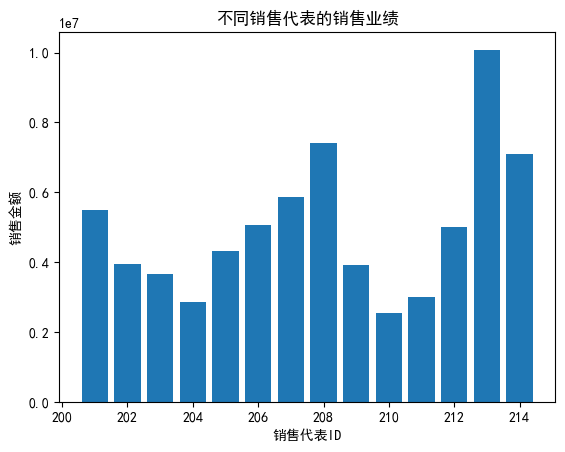

In [44]:
plt.bar(sales_performance['销售代表ID'], sales_performance['金额'])
plt.xlabel('销售代表ID')
plt.ylabel('销售金额')
plt.title('不同销售代表的销售业绩')
plt.show()

In [45]:
#分析销售代表的客户忠诚度
customer_status = data.groupby('销售代表ID').agg({'客户编号': pd.Series.nunique})
customer_status = customer_status.reset_index()

In [46]:
customer_status

,销售代表ID,客户编号
0,201,342
1,202,190
2,203,335
3,204,170
4,205,170
5,206,481
6,207,497
7,208,499
8,209,353
9,210,154


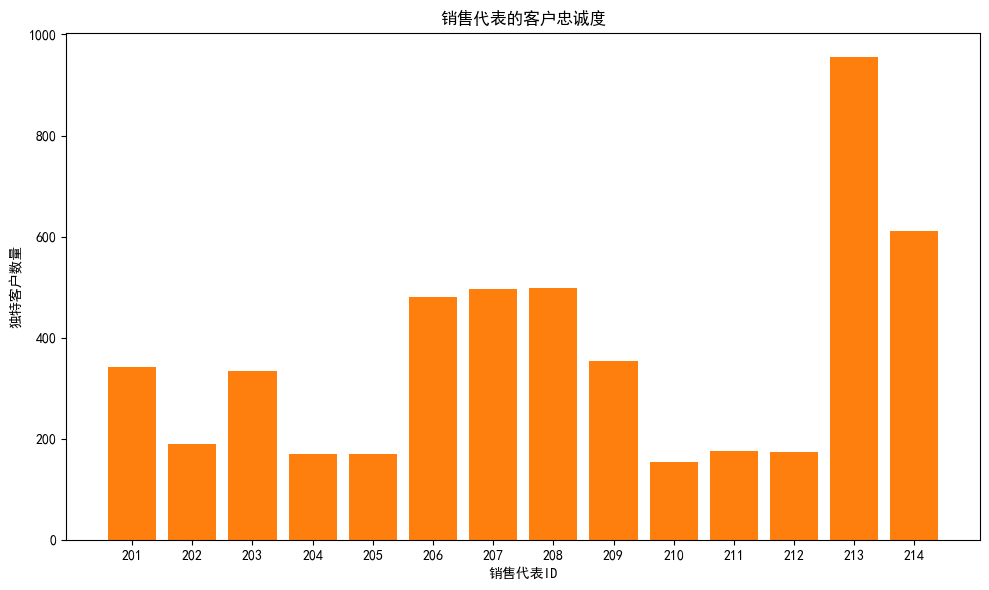

In [47]:
#绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(customer_status['销售代表ID'], customer_status['客户编号'], color='tab:orange')
ax.set_title('销售代表的客户忠诚度')
ax.set_xlabel('销售代表ID')
ax.set_ylabel('独特客户数量')
ax.set_xticks(customer_status['销售代表ID'])
plt.tight_layout()
plt.show()

In [48]:
# 统计每个产品的平均价格和销售数量
product_stats = data.groupby('产品名称').agg({'金额': 'mean', '数量': 'mean'})
product_stats = product_stats.sort_values(by='金额', ascending=False)

In [49]:
product_stats

,金额,数量
产品名称,,
公路自行车,11034.053158,7.211718
山地自行车,9836.036980,6.798615
旅游自行车车架,7799.215385,13.307692
山地自行车车架,7546.688146,10.465596
公路自行车车架,7509.111215,13.724954
旅游自行车,7195.149639,4.871287
山地自行车后轮,1262.854597,6.620130
大齿盘,1233.482571,5.285714
公路自行车前轮,912.562583,4.668085


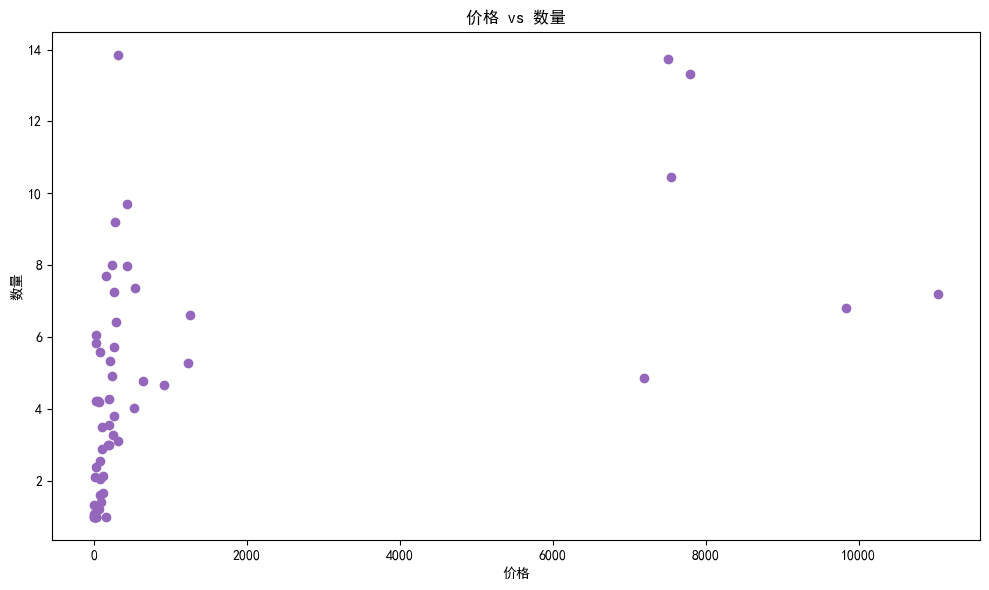

In [50]:
# 绘制散点图
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(product_stats['金额'], product_stats['数量'], color='tab:purple')
ax.set_title('价格 vs 数量')
ax.set_xlabel('价格')
ax.set_ylabel('数量')
plt.tight_layout()
plt.show()

In [51]:
# 将 'order_date' 列转换为日期类型
data['下单日期'] = pd.to_datetime(data['下单日期'])
# 提取年份并创建新列 '年'
data['年'] = data['下单日期'].dt.year
# 按年份分组计算销售量和销售额
yearly_sales = data.groupby('年').agg({'金额': 'sum', '数量': 'sum'})

In [52]:
yearly_sales

,金额,数量
年,,
2015,5.083130e+07,68579
2016,1.946860e+07,31576


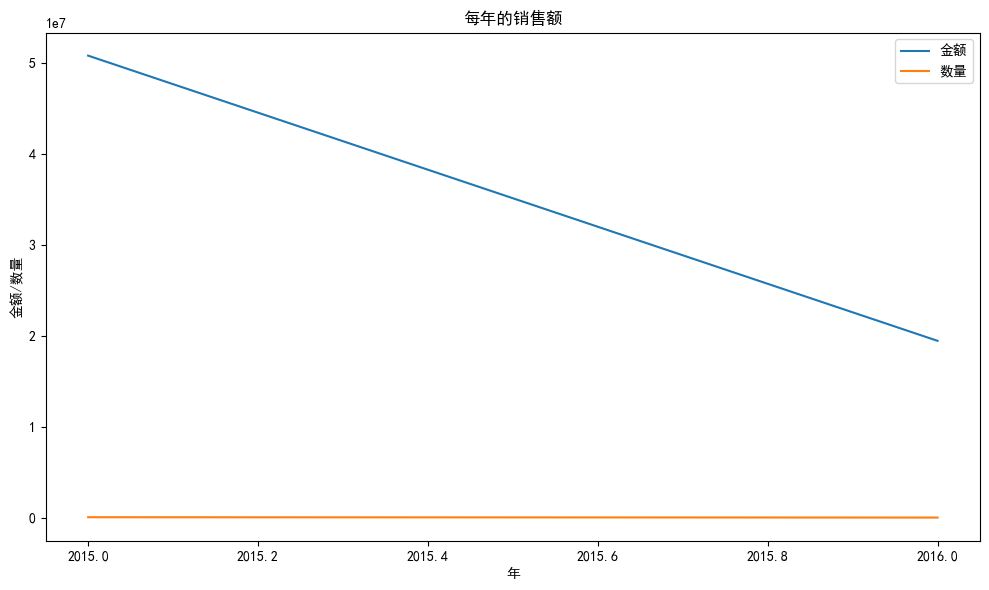

In [53]:
# 绘制折线图
fig, ax = plt.subplots(figsize=(10, 6))
yearly_sales.plot(kind='line', ax=ax)
ax.set_title('每年的销售额')
ax.set_xlabel('年')
ax.set_ylabel('金额/数量')
plt.tight_layout()
plt.show()

In [54]:
# 对销售额和销售数量进行排名
data['销售额排名'] = data.groupby('产品名称')['金额'].rank(ascending=False)
data['销售数量排名'] = data.groupby('产品名称')['数量'].rank(ascending=False)

In [55]:
# 分析销售额排名前5的产品
sales_by_product = data.groupby('产品名称')['金额'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='金额', ascending=False).head(5)

In [56]:
sales_by_product

,产品名称,金额
0,公路自行车,4.143287e+07
22,山地自行车,1.846224e+07
9,公路自行车车架,4.122502e+06
33,山地自行车车架,3.290356e+06
36,旅游自行车,7.267101e+05


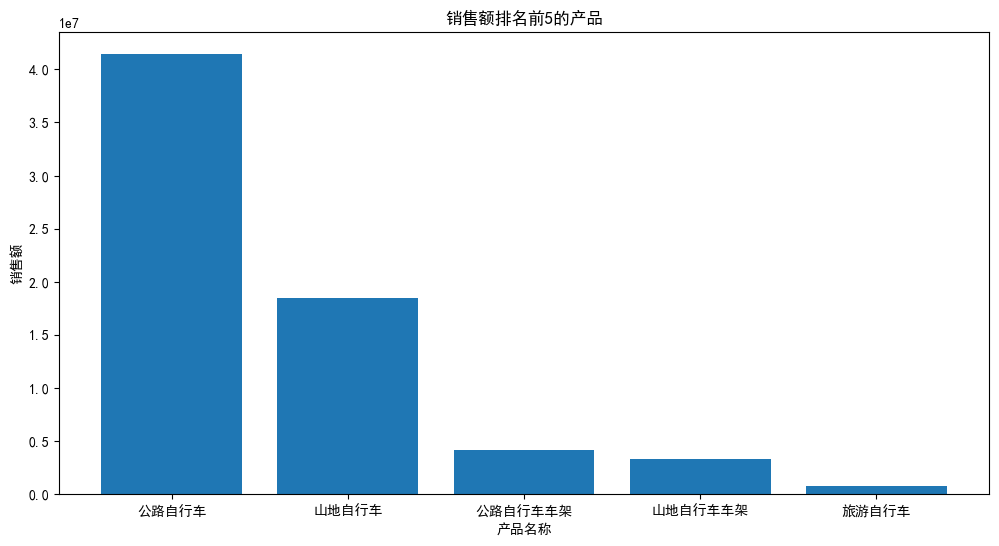

In [57]:
# 可视化销售额排名前5的产品
plt.figure(figsize=(12, 6))
plt.bar(sales_by_product['产品名称'], sales_by_product['金额'])
plt.xlabel('产品名称')
plt.ylabel('销售额')
plt.title('销售额排名前5的产品')
plt.show()

In [58]:
# 分析销售数量排名前5的产品
quantity_by_product = data.groupby('产品名称')['数量'].sum().reset_index()
quantity_by_product = quantity_by_product.sort_values(by='数量', ascending=False).head(5)

In [59]:
quantity_by_product

,产品名称,数量
0,公路自行车,27080
22,山地自行车,12761
9,公路自行车车架,7535
54,运动头盔,6188
10,冬用手套,6055


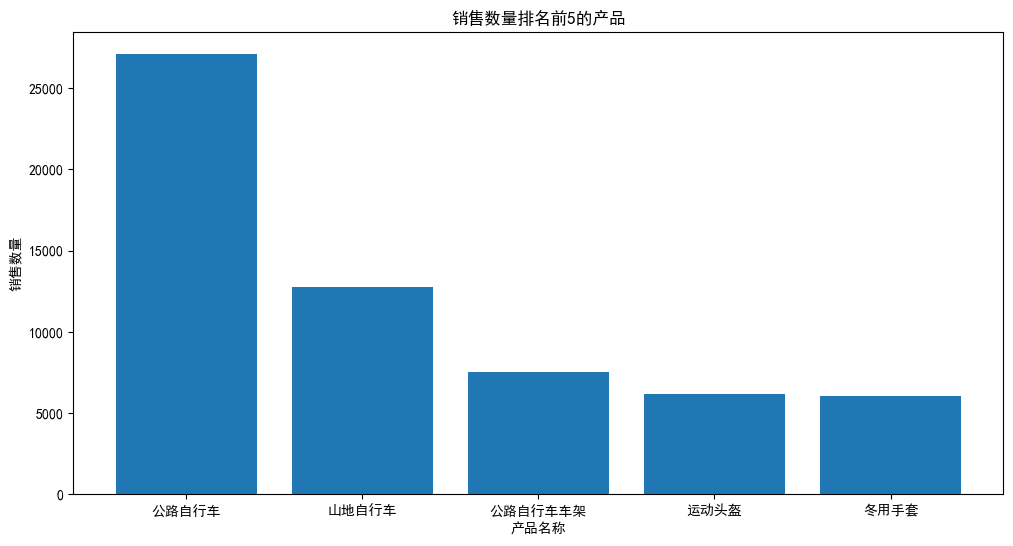

In [60]:
# 可视化销售数量排名前5的产品
plt.figure(figsize=(12, 6))
plt.bar(quantity_by_product['产品名称'], quantity_by_product['数量'])
plt.xlabel('产品名称')
plt.ylabel('销售数量')
plt.title('销售数量排名前5的产品')
plt.show()

In [61]:
# mlxtend 是一个提供了有用工具和算法的 Python 库，包括用于频繁项集挖掘和关联规则学习的 apriori 和 association_rules 函数
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [62]:
data_2 = pd.read_excel('./销售记录.xlsx')

In [63]:
# 从订单数据中提取关联规则所需的列
transactions = data_2.groupby(['订单编号', '产品名称'])['数量'].sum().unstack().reset_index().fillna(0)
transactions.set_index('订单编号', inplace=True)

In [64]:
# 将数据转换成0/1编码形式
def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1
transactions = transactions.applymap(encode_units)

In [65]:
transactions = transactions.applymap(encode_units).astype(bool)

In [66]:
# 使用Apriori算法挖掘频繁项集
frequent_itemsets = apriori(transactions, min_support=0.05, use_colnames=True)

In [67]:
# 根据频繁项集生成关联规则
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [68]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(公路自行车),(公路自行车车架),0.572933,0.083766,0.068660,0.119840,1.430661,0.020668,1.040986,0.704859
1,(公路自行车车架),(公路自行车),0.083766,0.572933,0.068660,0.819672,1.430661,0.020668,2.368283,0.328543
2,(山地自行车),(冬用手套),0.286390,0.066677,0.060421,0.210975,3.164142,0.041326,1.182882,0.958449
3,(冬用手套),(山地自行车),0.066677,0.286390,0.060421,0.906178,3.164142,0.041326,7.606038,0.732821
4,(女士紧身衣),(帽子),0.071712,0.108026,0.064236,0.895745,8.291964,0.056489,8.555672,0.947337
...,...,...,...,...,...,...,...,...,...,...
63,"(长袖运动衫, 帽子)","(运动头盔, 女士紧身衣)",0.089564,0.053555,0.050809,0.567291,10.592670,0.046012,2.187257,0.994682
64,(女士紧身衣),"(长袖运动衫, 帽子, 运动头盔)",0.071712,0.067897,0.050809,0.708511,10.435008,0.045940,3.197724,0.974017
65,(运动头盔),"(长袖运动衫, 帽子, 女士紧身衣)",0.122673,0.063320,0.050809,0.414179,6.541036,0.043041,1.598919,0.965568
66,(帽子),"(长袖运动衫, 运动头盔, 女士紧身衣)",0.108026,0.052029,0.050809,0.470339,9.039888,0.045188,1.789769,0.997090


* antecedents（前项）：关联规则中表示前提条件的商品组合
* consequents（后项）：关联规则中表示结果的商品组合，即在前项发生的情况下可能会一起购买的商品
* antecedent support（前项支持度）：包含前项的交易在总交易中所占的比例。例如0.572933表示在所有交易中，包含公路自行车的交易占比约为 57.29%
* consequent support（后项支持度）：包含后项的交易在总交易中所占的比例，例如0.068660表示包含公路自行车车架的交易占比约为 6.87%
* support（支持度）：同时包含前项和后项的交易在总交易中所占的比例，例如0.068660表示同时购买公路自行车和公路自行车车架的交易占比约为 6.87%
* confidence（置信度）：在前项出现的情况下，后项出现的概率，例如0.119840表示在购买了公路自行车的情况下，购买公路自行车车架的概率约为 11.98%
* lift（提升度）：衡量关联规则的强度，提升度大于 1 表示前项和后项之间存在正相关关系，例如1.430661表示购买公路自行车对购买公路自行车车架有一定的提升作用。
* leverage（杠杆率）：表示前项和后项同时出现的频率与它们各自独立出现频率的差异。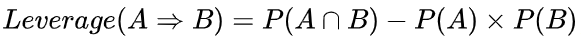
 * 如果杠杆率为，则表示前项和后项的出现是相互独立的，即它们同时出现的频率等于它们各自独立出现频率的乘积，意味着两者之间没有关联关系。
 * 当杠杆率大于0时，说明前项和后项同时出现的频率高于它们各自独立出现频率的乘积，这表明存在一定的关联关系，且数值越大，关联程度相对越强。
* conviction（确信度）：
 * 当确信度的值越大时，表示前项对后项的影响越显著，即如果前项不发生，后项发生的可能性就越小。例如，确信度为5，意味着如果前项不出现，后项出现的概率会降低为原来的1/5。
 * 如果确信度接近1，说明前项对后项的影响较小，即使前项不出现，后项出现的概率也不会有太大变化，这可能暗示前项和后项之间的关联关系不太强。
* zhangs_metric（张氏度量）:一种用于评估关联规则的度量指标
 * 当 Zhangs_metric 值较高时，表示关联规则在数据集中具有较强的关联性和相对较高的普遍性。这意味着该规则所涉及的前项和后项商品组合之间的关系较为紧密
 * Zhangs_metric 值较低可能意味着关联规则的关联性较弱，即前项和后项商品之间的联系不紧密

In [69]:
rules.shape

(68, 10)

In [70]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(公路自行车),(公路自行车车架),0.572933,0.083766,0.068660,0.119840,1.430661,0.020668,1.040986,0.704859
1,(公路自行车车架),(公路自行车),0.083766,0.572933,0.068660,0.819672,1.430661,0.020668,2.368283,0.328543
2,(山地自行车),(冬用手套),0.286390,0.066677,0.060421,0.210975,3.164142,0.041326,1.182882,0.958449
3,(冬用手套),(山地自行车),0.066677,0.286390,0.060421,0.906178,3.164142,0.041326,7.606038,0.732821
4,(女士紧身衣),(帽子),0.071712,0.108026,0.064236,0.895745,8.291964,0.056489,8.555672,0.947337


In [71]:
rules.tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63,"(长袖运动衫, 帽子)","(运动头盔, 女士紧身衣)",0.089564,0.053555,0.050809,0.567291,10.592670,0.046012,2.187257,0.994682
64,(女士紧身衣),"(长袖运动衫, 帽子, 运动头盔)",0.071712,0.067897,0.050809,0.708511,10.435008,0.045940,3.197724,0.974017
65,(运动头盔),"(长袖运动衫, 帽子, 女士紧身衣)",0.122673,0.063320,0.050809,0.414179,6.541036,0.043041,1.598919,0.965568
66,(帽子),"(长袖运动衫, 运动头盔, 女士紧身衣)",0.108026,0.052029,0.050809,0.470339,9.039888,0.045188,1.789769,0.997090
67,(长袖运动衫),"(运动头盔, 帽子, 女士紧身衣)",0.111382,0.050961,0.050809,0.456164,8.951202,0.045132,1.745084,0.999624


In [72]:
# 打印关联规则
print(rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0     (公路自行车)   (公路自行车车架)            0.572933            0.083766  0.068660   
1   (公路自行车车架)     (公路自行车)            0.083766            0.572933  0.068660   
2     (山地自行车)      (冬用手套)            0.286390            0.066677  0.060421   
3      (冬用手套)     (山地自行车)            0.066677            0.286390  0.060421   
4     (女士紧身衣)        (帽子)            0.071712            0.108026  0.064236   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.119840  1.430661  0.020668    1.040986       0.704859  
1    0.819672  1.430661  0.020668    2.368283       0.328543  
2    0.210975  3.164142  0.041326    1.182882       0.958449  
3    0.906178  3.164142  0.041326    7.606038       0.732821  
4    0.895745  8.291964  0.056489    8.555672       0.947337  


In [73]:
# 定义一个函数用于根据关联规则为用户推荐相关产品
def recommend_products(products, rules):
    recommended_products = set()
    for product in products:
        filtered_rules = rules[rules['antecedents'] == frozenset((product,))]
        recommended_products.update(filtered_rules['consequents'].apply(lambda x: tuple(x)).values)
    return recommended_products

In [74]:
# 随机选择一个用户
user = data['客户编号'].sample(n=1).values[0]

In [75]:
# 获取该用户购买过的产品
user_products = data[data['客户编号'] == user]['产品名称'].unique()

In [76]:
user_products

array(['公路自行车'], dtype=object)

In [77]:
# 根据关联规则为用户推荐产品
recommended_products = recommend_products(user_products, rules)

In [78]:
recommended_products

{('公路自行车车架',)}

In [79]:
print("用户{}购买过的产品：".format(user))
print(user_products)
print('\n')
print("推荐的产品：")
print(recommended_products)

用户10-4030-015343购买过的产品：
['公路自行车']


推荐的产品：
{('公路自行车车架',)}
